# WeatherPy

In [98]:
# Dependencies and Setup
import openweathermapy.core as owm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import urllib as err
import pprint
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Check API key
#print(api_key)

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [123]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
#print(lats)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#print(cities)
len(cities)
cities




['punta arenas',
 'durant',
 'qaanaaq',
 'bredasdorp',
 'florence',
 'kaitangata',
 'amderma',
 'geraldton',
 'nizhneyansk',
 'saint george',
 'ushuaia',
 'vaini',
 'carnarvon',
 'umm durman',
 'port alfred',
 'mataura',
 'hamilton',
 'albany',
 'maldonado',
 'porosozero',
 'broken hill',
 'coos bay',
 'hithadhoo',
 'bambous virieux',
 'cabo san lucas',
 'busselton',
 'taolanaro',
 'yerbogachen',
 'yellowknife',
 'clyde river',
 'ribeira grande',
 'bluff',
 'sinnamary',
 'butaritari',
 'luderitz',
 'kapuskasing',
 'rikitea',
 'sabzevar',
 'tuktoyaktuk',
 'iqaluit',
 'bang saphan',
 'belushya guba',
 'ust-kamchatsk',
 'padang',
 'barrow',
 'new norfolk',
 'tiksi',
 'nanortalik',
 'ancud',
 'buala',
 'sao filipe',
 'sibolga',
 'faanui',
 'hermanus',
 'itarema',
 'henties bay',
 'baykit',
 'mayo',
 'illoqqortoormiut',
 'hilo',
 'palmer',
 'hobart',
 'severo-kurilsk',
 'verkhnyaya inta',
 'monster',
 'poum',
 'leshukonskoye',
 'agadez',
 'tahta',
 'port lincoln',
 'georgetown',
 'geylegphu

## Perform API Calls

In [125]:
# Define URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
#settings['appid']

In [14]:
# Get current weather
city_name = []
city_id = []
country_name = []
lat = []
long = []
temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
current_date = []
color_name=['darkblue', 'lightbue', 'red', 'darkred']
print(F"Begining Data Retreiving")
print('--------------------------')
#print(len(cities))
for count in range(0, len(cities)) :
    try:
        current_weather = owm.get_current(cities[count], **settings)
        print(f"Processing Record {count+1} of Set 1 | {cities[count]}")
        construct_url = url +"appid=" + settings['appid'] + "&q=" + cities[count]+ "&units="+ settings['units']
        #print(contruct_url)
        response_json = requests.get(construct_url).json()
        response_json
        
        #print(response.status_code)
        #pprint.pprint(response_json)
        #print(response_json['name'])
        #print(count)
        
        city_name.append(response_json['name'])
        city_id.append(response_json['id'])

        country_name.append(response_json['sys']['country'])
        lat.append(response_json['coord']['lat'])
        long.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        current_date.append(response_json['dt'])
        
    except err.error.HTTPError:
        print("City not found! Skipping...")

Begining Data Retreiving
--------------------------
Processing Record 1 of Set 1 | north bend
City not found! Skipping...
Processing Record 3 of Set 1 | male
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | zunyi
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | barranca
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | kerouane
City not found! Skipping...
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | ikongo
Processing Record 23 of Set 1 | sao felix do xingu
Processing Record 24 

Processing Record 203 of Set 1 | soe
Processing Record 204 of Set 1 | okhotsk
City not found! Skipping...
Processing Record 206 of Set 1 | ponta do sol
Processing Record 207 of Set 1 | aksu
Processing Record 208 of Set 1 | sitka
Processing Record 209 of Set 1 | greenwood
Processing Record 210 of Set 1 | curuguaty
Processing Record 211 of Set 1 | te anau
Processing Record 212 of Set 1 | kahului
Processing Record 213 of Set 1 | bubaque
Processing Record 214 of Set 1 | khatanga
Processing Record 215 of Set 1 | carauari
City not found! Skipping...
Processing Record 217 of Set 1 | banyo
City not found! Skipping...
Processing Record 219 of Set 1 | saskylakh
Processing Record 220 of Set 1 | rocha
Processing Record 221 of Set 1 | fairbanks
City not found! Skipping...
Processing Record 223 of Set 1 | yakymivka
Processing Record 224 of Set 1 | arsk
Processing Record 225 of Set 1 | kodiak
Processing Record 226 of Set 1 | lianyuan
Processing Record 227 of Set 1 | marovoay
Processing Record 228 of 

Processing Record 405 of Set 1 | bercel
Processing Record 406 of Set 1 | ulladulla
Processing Record 407 of Set 1 | cape coast
Processing Record 408 of Set 1 | bom jesus do galho
City not found! Skipping...
Processing Record 410 of Set 1 | ozark
Processing Record 411 of Set 1 | sabratah
Processing Record 412 of Set 1 | peniche
Processing Record 413 of Set 1 | ouadda
Processing Record 414 of Set 1 | presidencia roque saenz pena
Processing Record 415 of Set 1 | salalah
Processing Record 416 of Set 1 | mula
Processing Record 417 of Set 1 | iracoubo
Processing Record 418 of Set 1 | millinocket
Processing Record 419 of Set 1 | solec kujawski
City not found! Skipping...
Processing Record 421 of Set 1 | tanabe
Processing Record 422 of Set 1 | rosarito
Processing Record 423 of Set 1 | tucuman
Processing Record 424 of Set 1 | comodoro rivadavia
Processing Record 425 of Set 1 | pasni
Processing Record 426 of Set 1 | loknya
Processing Record 427 of Set 1 | petropavlovsk-kamchatskiy
Processing Rec

## Create a data frame for weather data

In [100]:
# Data frame for weather data 
weather_data = pd.DataFrame({'City':city_name,
                             'City ID': city_id,
                             'Country':country_name,
                             'Latitude': lat,
                             'Longitude': long,
                             'Temperature':temp,
                             'Humidity': humidity,
                             'Cloudiness': cloudiness,
                             'Wind Speed': wind_speed,
                             'Date': current_date})
weather_data.head()
#Get analysis date from the dataset
analysis_date =  pd.to_datetime(weather_data['Date'][0], unit='s').date()
#format date
analysis_date = str(analysis_date.month)+'/'+str(analysis_date.day)+'/'+str(analysis_date.year)

## Convert Raw Data to DataFrame

In [102]:
weather_data.to_csv("..\WeatherData.csv")
weather_data.head()

,City,City ID,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,Date
0,North Bend,5742974,US,43.41,-124.22,63.00,77,1,13.87,1562558701
1,Male,695464,UA,50.74,33.70,61.61,94,100,3.71,1562558701
2,Mahebourg,934322,MU,-20.41,57.70,71.01,100,75,1.12,1562558702
3,Punta Arenas,3874787,CL,-53.16,-70.91,39.20,93,75,9.17,1562558583
4,Mataura,6201424,NZ,-46.19,168.86,45.00,82,100,8.99,1562558702


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

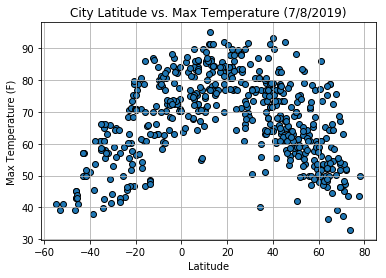

In [151]:
plt.scatter(weather_data['Latitude'], weather_data['Temperature'], edgecolors='black')
plt.title(F"City Latitude vs. Max Temperature ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("..\images\latVsTemperature.png")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

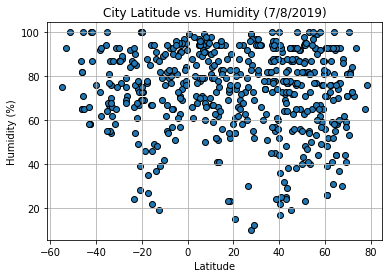

In [128]:
plt.scatter(weather_data['Latitude'], weather_data['Humidity'], edgecolors='black')
plt.title(f"City Latitude vs. Humidity ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("..\images\latVsHumidity.png")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

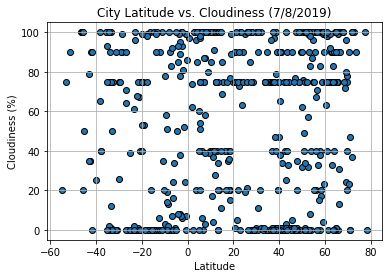

In [129]:
plt.scatter(weather_data['Latitude'], weather_data['Cloudiness'], edgecolors='black')
plt.title(f"City Latitude vs. Cloudiness ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("..\images\latVsCloudiness.png")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

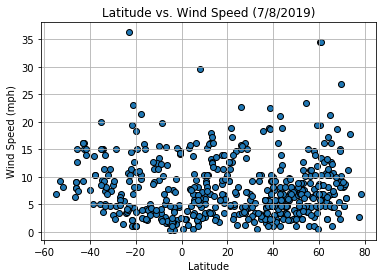

In [152]:
p2= plt.scatter(weather_data['Latitude'], weather_data['Wind Speed'], edgecolors='black')
plt.title(F"Latitude vs. Wind Speed ({analysis_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("..\images\latVsWindSpeed.png")
plt.grid()
plt.show()

In [149]:
print(f"City with highest wind speed: ")
print(f"----------------------------- ")
print(f"{weather_data.loc[weather_data['Wind Speed'].idxmax()]}")
print("")
print("")
print(f"City with lowest Humidity: ")
print(f"-------------------------- ")
print(f"{weather_data.loc[weather_data['Humidity'].idxmin()]}")

City with highest wind speed: 
----------------------------- 
City              Rikitea
City ID           4030556
Country                PF
Latitude           -23.12
Longitude         -134.97
Temperature          70.5
Humidity               90
Cloudiness            100
Wind Speed          36.28
Date           1562558537
Name: 28, dtype: object


City with lowest Humidity: 
-------------------------- 
City                Adrar
City ID           2508813
Country                DZ
Latitude            27.87
Longitude           -0.29
Temperature          89.6
Humidity               10
Cloudiness              0
Wind Speed          16.11
Date           1562558776
Name: 306, dtype: object


In [150]:
print(f"City with highest Temperature: ")
print(f"----------------------------- ")
print(f"{weather_data.loc[weather_data['Temperature'].idxmax()]}")
print("")
print("")
print(f"City with lowest Temperature: ")
print(f"-------------------------- ")
print(f"{weather_data.loc[weather_data['Temperature'].idxmin()]}")

City with highest wind speed: 
----------------------------- 
City           Mamallapuram
City ID             1263997
Country                  IN
Latitude              12.63
Longitude             80.17
Temperature              95
Humidity                 41
Cloudiness               40
Wind Speed            16.11
Date             1562558733
Name: 133, dtype: object


City with lowest Humidity: 
-------------------------- 
City               Dikson
City ID           1507390
Country                RU
Latitude            73.51
Longitude           80.55
Temperature         32.92
Humidity               93
Cloudiness             90
Wind Speed          17.83
Date           1562558731
Name: 122, dtype: object
